In [1]:
#For documentation, please read https://docs.google.com/document/d/1sMi-LHQw3Y1g_GU1WOOya1ebcuMSvwsWWNfs9Qw-mPM/edit?usp=sharing

###General Imports###

#Sys is package useful for interfacing with your computer directly
import sys

#NumPy is useful for data analysis and complex mathematic calculations
import numpy as np

#Matplotlib is useful for visualizing your data in graphs
import matplotlib.pyplot as plt



###ROI Imports###

#The becquerel package is a spectral analysis package developed by LBNL, required for ROI.py
from becquerel import Spectrum

#Importlib helps with importing packages, scripts, and functions
import importlib

#Define the path where you have analysis_methods.py and ROI.py saved on your computer
sys.path.insert(0,r"C:\Users\benhu\Documents\Github\radwatch-analysis")

#analysis_methods.py have functions we need for ROI.py
import analysis_methods as am

#ROI.py is what we will be using. It helps with importing spectrum and analyzing it.
import ROI

#Reload packages
importlib.reload(am)
importlib.reload(ROI)

'\nfilename = \'UCB1901PetraleSole\'\nc = __import__("UCB1901PetraleSoleConfig")'

In [36]:
#Define the path where your foreground spectrum .Spe file is saved.
filename = '/exampledata/UCB1901PetraleSole.spe'

#Define the path where your background spectrum .Spe file is saved.
background = '/exampledata/background1.spe'

#List out source energies of interest. For instance, here we are looking at Cesium-134 (605keV), Bismuth-214 (609keV),
#Cesium-137 (662keV), Potassium-40 (1461keV), and Thallium-208 (2614keV)
source_energies = [605, 609, 662, 1460, 2614]

#Import your foreground and background spectrum
spec = Spectrum.from_file(filename)
bgspec = Spectrum.from_file(background)

#Initiate the ROI object
roi = ROI.ROI(spec, bgspec, source_energies, 0)

#Has ROI.py center each desired peak to a local maximum
#Peaks should still be referred to as how you defined them in source_energies for dictionaries.
roi.find_peak_energies()

SpeFile: Reading file C:/Users/benhu/Documents/GitHub/radwatch-analysis/GammaAnalysis/FishSamples/DataFiles/UCB1901PetraleSole.spe
SpeFile: Reading file C:/Users/benhu/Documents/GitHub/radwatch-analysis/GammaAnalysis/FishSamples/DataFiles/background1.spe
605keV peak changed to 607keV
609keV peak changed to 611keV
662keV peak changed to 664keV
1460keV peak changed to 1462keV
2614keV peak changed to 2617keV


In [38]:
roi.roi_pars

{'605': [607,
  1,
  [[-2, -1], [-0.75, 1.25], [1, 2]],
  [[-2, -1], [-0.5, 0.5], [1, 2]]],
 '609': [611,
  5,
  [[-2, -1], [-0.75, 0.75], [1, 2]],
  [[-2, -1], [-0.5, 0.5], [1, 2]]],
 '662': [664,
  5,
  [[-2, -1], [-0.4, 0.4], [1, 2]],
  [[-2, -1], [-0.5, 0.5], [1, 2]]],
 '1460': [1462,
  15,
  [[-2, -1], [-0.5, 0.75], [1, 2]],
  [[-2, -1], [-0.5, 0.5], [1, 2]]],
 '2614': [2617,
  20,
  [[-2, -1], [-0.4, 0.75], [1, 2]],
  [[-2, -1], [-0.5, 0.5], [1, 2]]]}

{'605': [607, 4, [[-2, -1], [-0.6, 0.3], [2, 4]], [[-2, -1], [-0.5, 0.5], [1, 2]]], '609': [611, 5, [[-2, -1], [-0.75, 0.75], [1, 2]], [[-2, -1], [-0.5, 0.5], [1, 2]]], '662': [664, 7, [[-2, -1], [-1, 1], [1, 2]], [[-2, -1], [-0.5, 0.5], [1, 2]]], '1460': [1462, 15, [[-2, -1], [-0.5, 0.75], [1, 2]], [[-2, -1], [-0.5, 0.5], [1, 2]]], '2614': [2617, 20, [[-2, -1], [-0.4, 0.75], [1, 2]], [[-2, -1], [-0.5, 0.5], [1, 2]]]}


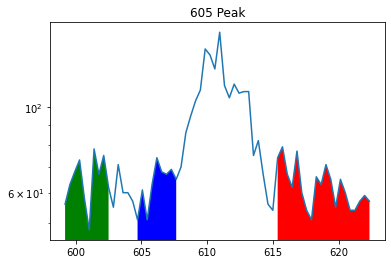

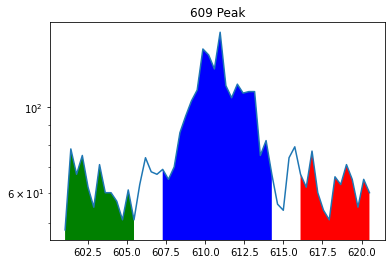

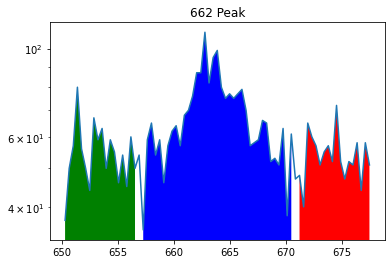

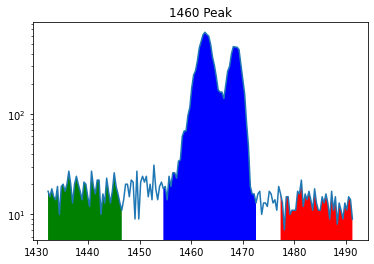

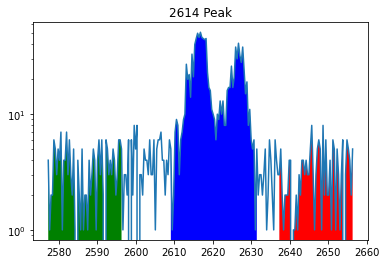

In [48]:
#Specify ROI boundaries here. There is a default value, so this isn't necessary, but if the default isn't good enough,
#you may specify the desired ROI in terms of [delta_e, [[a, b], [c, d], [e, r]]]. See documentation for further info.
roi.set_sideband(605, 4, [[-2, -1], [-0.6, 0.3], [2, 4]])
roi.set_sideband(609, 5, [[-2, -1], [-0.75, 0.75], [1, 2]])
roi.set_sideband(662, 7, [[-2, -1], [-1, 1], [1, 2]])
roi.set_sideband(1460, 15, [[-2, -1], [-0.5, 0.75], [1, 2]])
roi.set_sideband(2614, 20, [[-2, -1], [-0.4, 0.75], [1, 2]])

#If you want to see what the current ROI parameters are, you can print roi.roi_pars
#print(roi.roi_pars)

#Visualize the ROI selections and adjust as you see fit
roi.plot_peak_region(605)
roi.plot_peak_region(609)
roi.plot_peak_region(662)
roi.plot_peak_region(1460)
roi.plot_peak_region(2614)

In [49]:
#roi.get_counts() calculates the counts from the ROI boundaries it is given and saves the results 
#to a list in the order that source_energies was defined.
roi_counts, roi_unc = roi.get_counts()
print(roi_counts)
print(roi_unc)

background spec sidebands 817.8697538177734
bg peak counts 615.4998475592107
signal bg 572.8499999999999
signal peak 569.0
background spec sidebands 678.4387213260657
bg peak counts 1264.5602102525115
signal bg 1240.0
signal peak 2050.0000000000005
background spec sidebands 844.0469556223635
bg peak counts 1039.0335485514265
signal bg 2006.2222222222222
signal peak 2487.9999999999995
background spec sidebands 587.4208832303555
bg peak counts 1944.496246869175
signal bg 770.7211538461538
signal peak 11126.0
background spec sidebands 171.4942323351999
bg peak counts 900.0930158962939
signal bg 209.39622641509433
signal peak 1199.9999999999998
[198.51990625856274, 223.8785110735546, 286.79118484871435, 8998.203482515026, 262.0049900238114]
[44.79043845087221, 68.6437052735034, 73.40410087496964, 119.23165330975718, 51.834274834397334]


In [50]:
#Efficiency calculations.
#You can specify an efficiency calibration .json file with set_parameters().
#By default, it looks for an eff_calibration_parameters.json file in its local directory.
eff_func = am.Efficiency()
eff_func.set_parameters()

efficiency = []
efficiencyunc = []
for i in source_energies:
    efficiency.append(eff_func.get_eff(i))
    efficiencyunc.append(eff_func.get_eff_error(i))

Loaded fit parameters 0-4: [-0.09752124 -0.41681079 -0.73212546 -1.11108914 -4.56337189]
Loaded fit covariance: [[3.26231638e-03 1.83712674e-02 3.06572343e-02 1.44862197e-02
  2.61692463e-04]
 [1.83712674e-02 1.04165237e-01 1.75854651e-01 8.50282275e-02
  1.72872980e-03]
 [3.06572343e-02 1.75854651e-01 3.02968626e-01 1.52669208e-01
  3.83852009e-03]
 [1.44862197e-02 8.50282275e-02 1.52669208e-01 8.38702927e-02
  3.30108144e-03]
 [2.61692463e-04 1.72872980e-03 3.83852009e-03 3.30108144e-03
  8.76676582e-04]]


In [22]:
#Calculate Count Rate
countrate = [i / spec.livetime for i in roi_counts]
uncrate = [i / spec.livetime for i in roi_unc]

print(efficiency)
print(countrate)
print(uncrate)

[0.01971955454209764, 0.019651406649166956, 0.018795493453193222, 0.01043477321540869, 0.0038844176554659457]
[0.0012679200414950546, 0.0012869391652979075, 0.0009976908249904096, 0.051725109406163566, 0.0015061047241570653]
[0.0002822261310781997, 0.00039459022817341376, 0.00026151379631870493, 0.0006853890695080372, 0.00029796320365595554]


In [53]:
#Weight of sample
#In this example, we are using the weight of the fish sample before drying.
wetweight = 519.9 #g

#Calculate specific activity
sactivity, sactunc = [(i / j) / wetweight for i, j in zip(countrate, efficiency)], [(i / j) / wetweight for i, j in zip(uncrate, efficiency)]
for i, j, k in zip(source_energies, sactivity, sactunc):
    print("Specific activity at", i, "keV:", j, "±", k, "Bq/g (wet weight)")

Specific activity at 605 keV: 0.00012367301515010242 ± 2.7528357816185774e-05 Bq/g (wet weight)
Specific activity at 609 keV: 0.00012596345314944572 ± 3.8621831598578446e-05 Bq/g (wet weight)
Specific activity at 662 keV: 0.0001020992210794074 ± 2.6762153401496125e-05 Bq/g (wet weight)
Specific activity at 1460 keV: 0.009534514548298793 ± 0.00012633810018951183 Bq/g (wet weight)
Specific activity at 2614 keV: 0.0007457777701153244 ± 0.0001475424185548089 Bq/g (wet weight)
